In [4]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from pycaret.classification import * 
from dataprep.eda import create_report

In [2]:
train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)

In [9]:
# report = create_report(train)
# report.save('dataprep_reoprt')

  0%|                                                                                         | 0/2359 [00:00<…

Report has been saved to dataprep_reoprt.html!


1. train.csv : 학습 데이터
- id : 샘플 아이디
- Gender : 성별
- Customer Type : Disloyal 또는 Loyal 고객
- Age : 나이
- Type of Travel : Business 또는 Personal Travel
- Class : 등급
- Flight Distance : 비행 거리
- Seat comfort : 좌석 만족도
- Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
- Food and drink : 식음료 만족도
- Gate location : 게이트 위치 만족도
- Inflight wifi service : 기내 와이파이 서비스 만족도
- Inflight entertainment : 기내 엔터테인먼트 만족도
- Online support : 온라인 지원 만족도
- Ease of Online booking : 온라인 예매 편리성 만족도
- On-board service : 탑승 서비스 만족도
- Leg room service : Leg room 서비스 만족도
- Baggage handling : 수하물 처리 만족도
- Checkin service : 체크인 서비스 만족도
- Cleanliness : 청결도 만족도
- Online boarding : 온라인보딩 만족도
- Departure Delay in Minutes : 출발 지연 시간
- Arrival Delay in Minutes : 도착 지연 시간
- target : 만족 여부

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2000 non-null   object 
 1   Customer Type                      2000 non-null   object 
 2   Age                                2000 non-null   int64  
 3   Type of Travel                     2000 non-null   object 
 4   Class                              2000 non-null   object 
 5   Flight Distance                    2000 non-null   int64  
 6   Seat comfort                       2000 non-null   int64  
 7   Departure/Arrival time convenient  2000 non-null   int64  
 8   Food and drink                     2000 non-null   int64  
 9   Gate location                      2000 non-null   int64  
 10  Inflight wifi service              2000 non-null   int64  
 11  Inflight entertainment             2000 non-null   int64

* 훈련 데이터가 3천개로 매우 적음

In [9]:
train.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


In [20]:
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

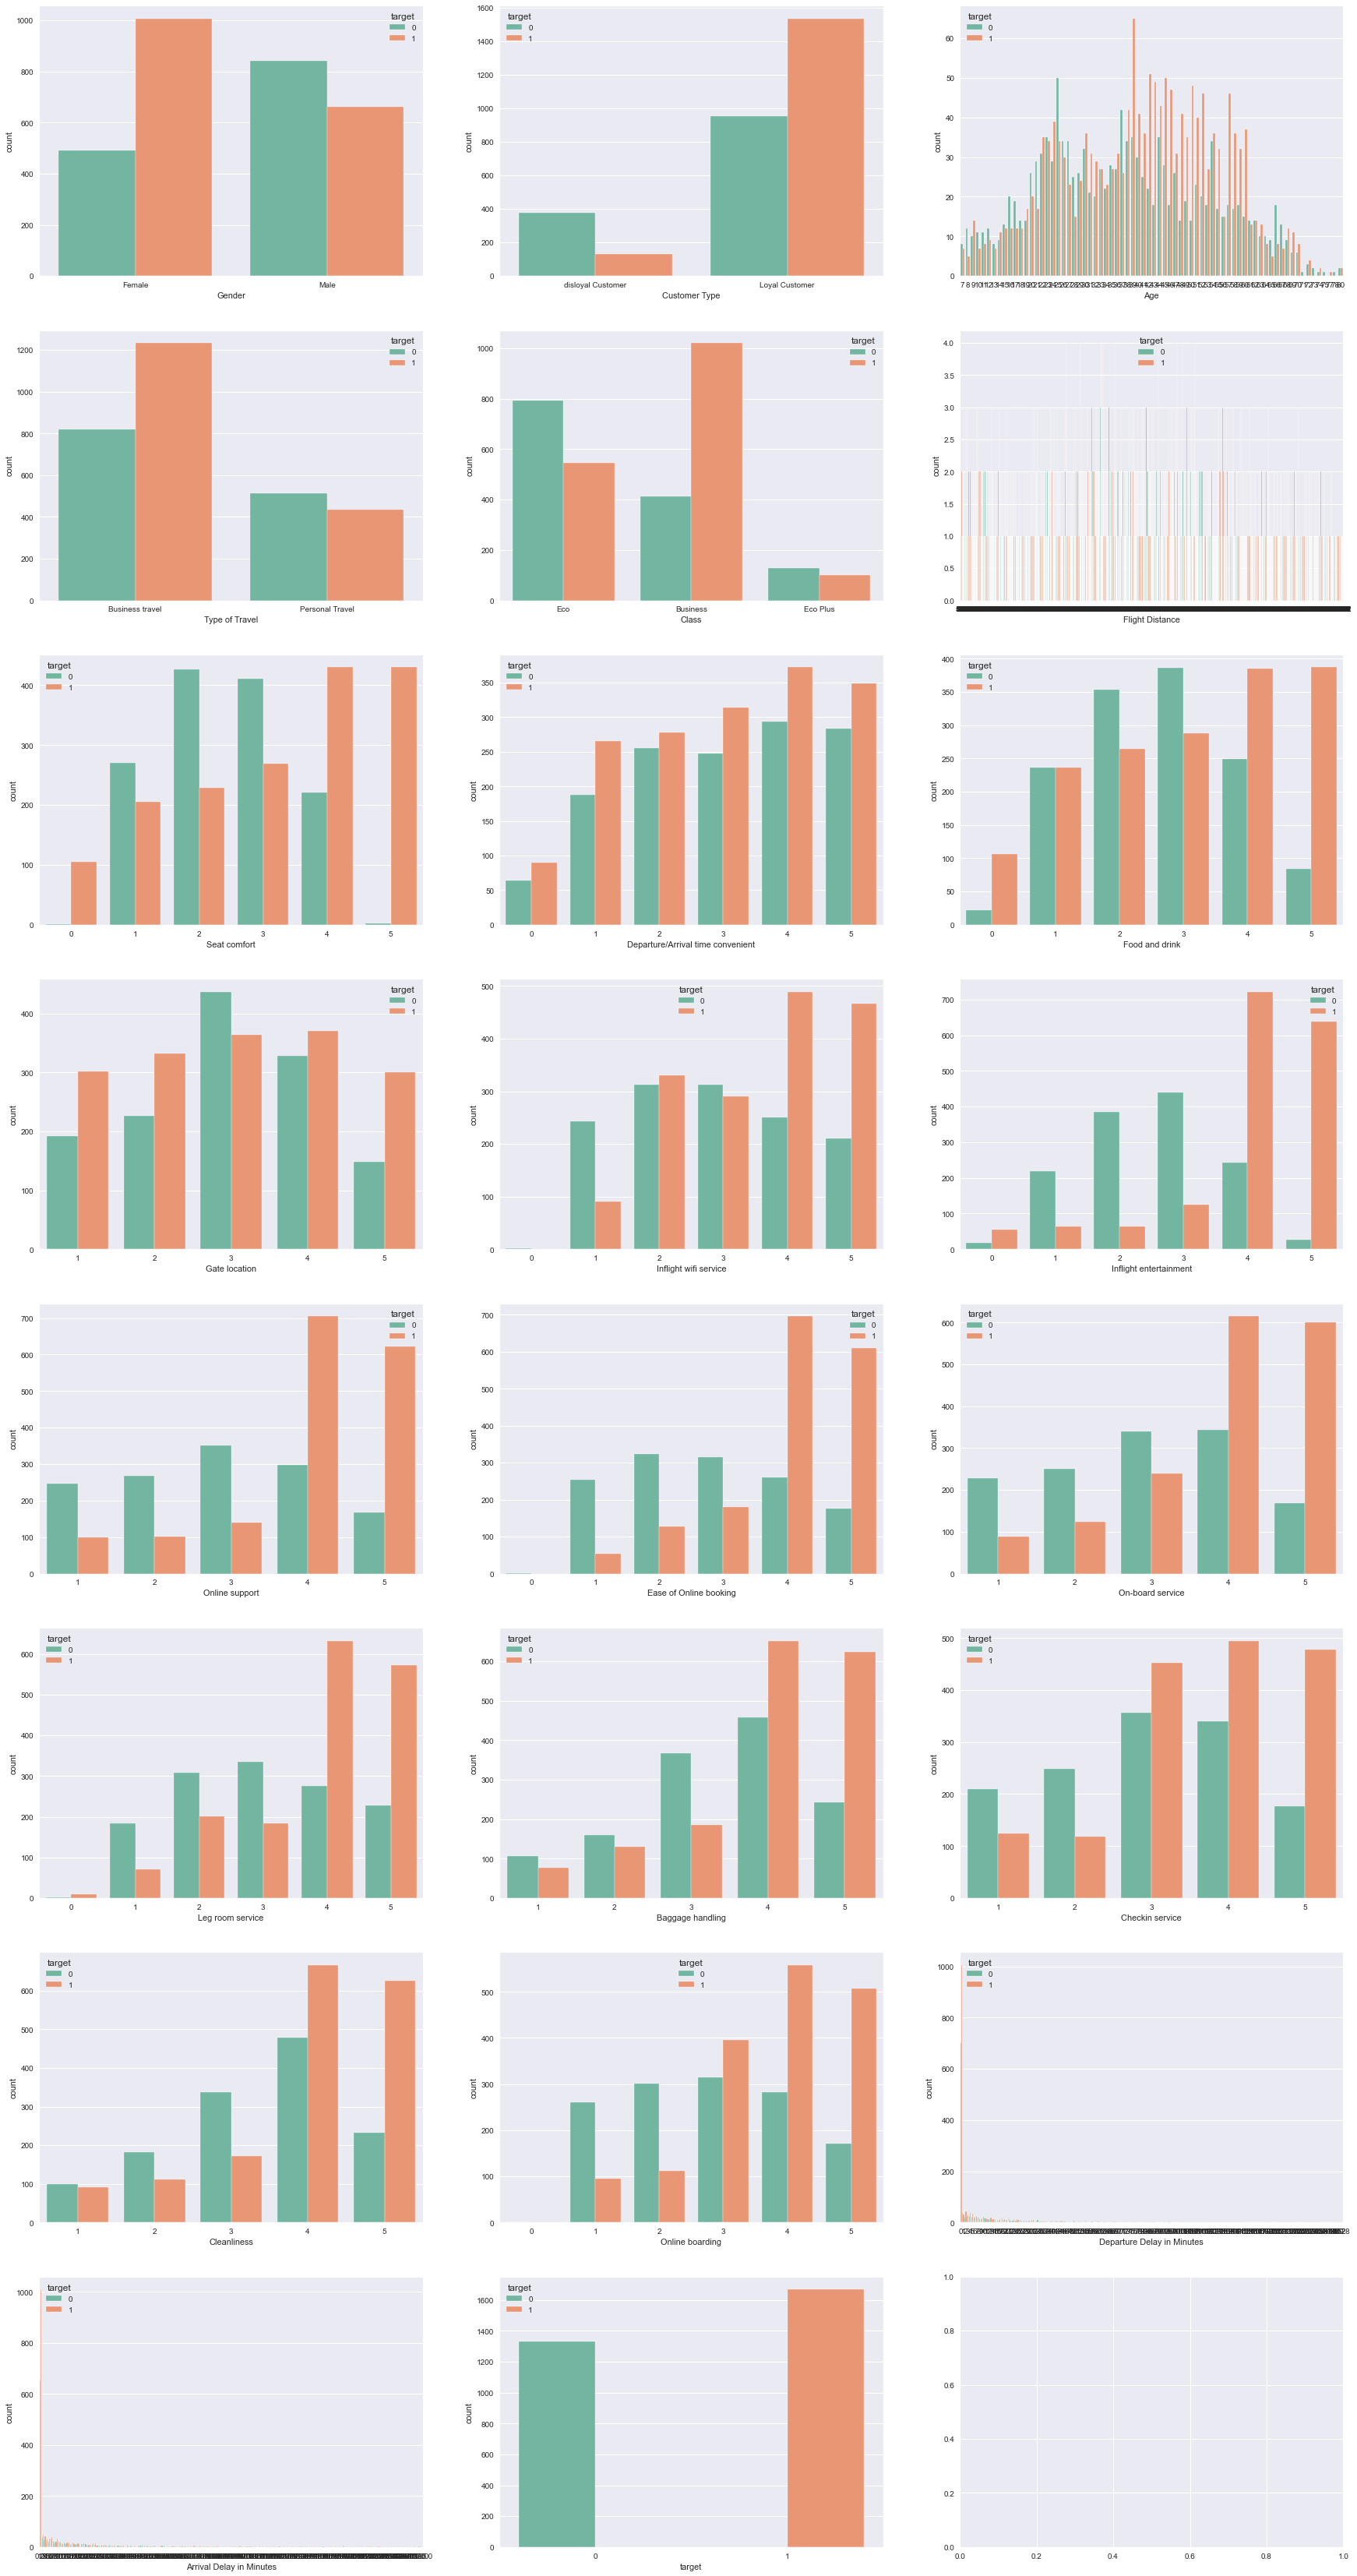

In [10]:
fig, ax = plt.subplots(nrows=8, ncols=3, figsize=(30, 60))
for i, col_name in enumerate(train.columns):
    sns.countplot(x=col_name, hue='target', data=train, ax=ax[i//3][i%3], palette='Set2')
plt.show()